In [1]:
from model import DenseNet,PPGNet
from torch.utils.data import Dataset
import torch
from torchviz import make_dot
from torchsummary import summary
import pickle
import numpy as np
from copy import copy

from ppg_sig_fea import ThreeModel
from torchsummary import summary

from tqdm import tqdm

In [4]:
data_path = '../da300s/'

mode = 'train'

mode = mode + '_exc'

with open(data_path + 'mesa/'+mode+'_label.pkl', 'rb') as f:
    test_label = pickle.load(f)

In [37]:
test_label[:10]

array([['3840', '23040', '60', '360', '6', '34', '1', '0001'],
       ['5760', '24960', '90', '390', '9', '37', '1', '0001'],
       ['7680', '26880', '120', '420', '12', '40', '1', '0001'],
       ['9600', '28800', '150', '450', '15', '43', '1', '0001'],
       ['11520', '30720', '180', '480', '18', '46', '1', '0001'],
       ['13440', '32640', '210', '510', '21', '49', '1', '0001'],
       ['15360', '34560', '240', '540', '24', '52', '1', '0001'],
       ['17280', '36480', '270', '570', '27', '55', '1', '0001'],
       ['19200', '38400', '300', '600', '30', '58', '1', '0001'],
       ['21120', '40320', '330', '630', '33', '61', '1', '0001']],
      dtype='<U21')

In [5]:
stage_len = list()
for i in range(4):
    stage_len.append(list())
    
i = 0
while i + 1 < len(test_label):
    stage_count = 0
    while( i+1 < len(test_label)
        and (test_label[i, 7] == test_label[i+1, 7]) 
        and (test_label[i, 6] == test_label[i+1, 6])):
        stage_count = stage_count + 1
        i = i + 1
    stage_len[int(test_label[i, 6])].append(stage_count)
    
    i = i + 1

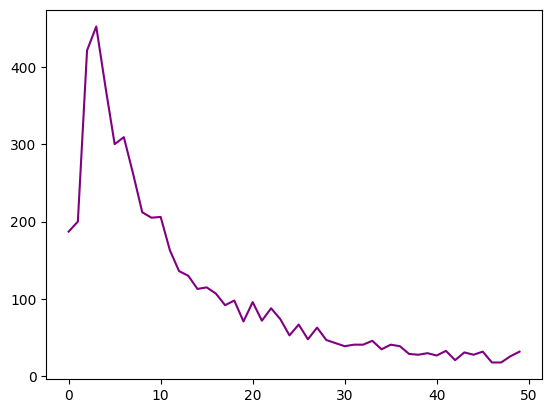

In [10]:
char_counts = np.unique(stage_len[0], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]

import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(char_counts[0][:50], char_counts[1][:50], color='purple' )#i
plt.show()

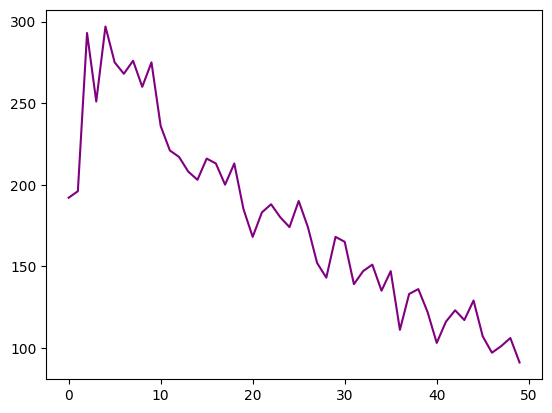

In [11]:
char_counts = np.unique(stage_len[1], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]

import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(char_counts[0][:50], char_counts[1][:50], color='purple' )#i
plt.show()

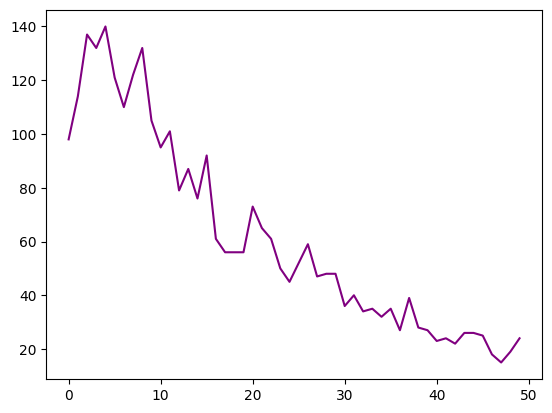

In [12]:
char_counts = np.unique(stage_len[2], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]

import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(char_counts[0][:50], char_counts[1][:50], color='purple' )#i
plt.show()

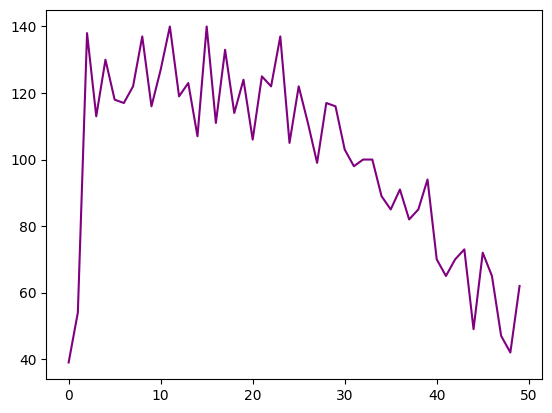

In [13]:
char_counts = np.unique(stage_len[3], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]

import matplotlib.pyplot as plt
ax = plt.axes()
ax.plot(char_counts[0][:50], char_counts[1][:50], color='purple' )#i
plt.show()

In [33]:
char_counts = np.unique(stage_len[0], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]
resu/np.sum(char_counts[1])

33.88752617409512

In [32]:
char_counts = np.unique(stage_len[1], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]
resu/np.sum(char_counts[1])

52.755702523957346

In [31]:
char_counts = np.unique(stage_len[2], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]
resu/np.sum(char_counts[1])

22.66831539132965

In [30]:
char_counts = np.unique(stage_len[3], return_counts=True)

resu = 0
for i in range(len(char_counts[0])):
    resu = resu + (char_counts[0][i]+1)*char_counts[1][i]
resu/np.sum(char_counts[1])

31.155403199477636